# Ramen Ratings Analysis: Unveiling What Makes Instant Noodles Great 🍜
Instant noodles are more than just a quick meal — they’re a global phenomenon with fierce brand loyalty, regional preferences, and a wide range of quality.
In this project, I dove deep into a dataset of over a thousand ramen product reviews across countries, brands, and styles to answer key questions:

### Which countries produce the highest-rated ramen?

### Which brands consistently deliver excellence?

### Does the packaging style impact product rating?

### What patterns can we discover from consumer ratings?

Using Python, I cleaned and explored the data, summarized categorical trends, and visualized key insights to better understand global preferences in ramen.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\wasee\Downloads\ramen-ratings.csv")
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [3]:
df_original = df.copy()

In [4]:
df_clean = df_original.copy()

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [6]:
df_clean.duplicated().sum()

0

In [7]:
df_clean['Style'].value_counts()

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [8]:
def fill_missing_by_mode(df, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)


In [9]:
fill_missing_by_mode(df_clean,'Style')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [11]:
df_clean.drop(columns=['Top Ten'],inplace=True)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2580 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


In [13]:
df_clean['Stars'] = pd.to_numeric(df_clean['Stars'], errors='coerce')


In [14]:
df_clean['Stars'] =df_clean['Stars'].fillna(df_clean['Stars'].median())


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2580 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


In [16]:
def categorize_rating(stars):
    if stars >= 4.0:
        return 'Excellent ⭐⭐⭐⭐'
    elif stars >= 3.0:
        return 'Good ⭐⭐⭐'
    elif stars >= 2.0:
        return 'Average ⭐⭐'
    elif stars > 0:
        return 'Poor ⭐'
    else:
        return 'Not Rated'




In [17]:
df_clean['Rating_Desc'] = df_clean['Stars'].apply(categorize_rating)

In [18]:
df_clean

,Review #,Brand,Variety,Style,Country,Stars,Rating_Desc
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Good ⭐⭐⭐
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,Poor ⭐
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Average ⭐⭐
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,Average ⭐⭐
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,Good ⭐⭐⭐
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,Good ⭐⭐⭐
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,Poor ⭐
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,Average ⭐⭐
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,Average ⭐⭐


In [19]:

# 10. تلخيص التوزيع للفئات
def summarize_categorical_distribution(df, column):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    return summary

In [20]:
summarize_categorical_distribution(df_clean,'Rating_Desc')

,Count,Percentage
Rating_Desc,,
Excellent ⭐⭐⭐⭐,1127,43.68
Good ⭐⭐⭐,1046,40.54
Average ⭐⭐,250,9.69
Poor ⭐,131,5.08
Not Rated,26,1.01


In [21]:
# فلترة المنتجات ذات التقييم الأعلى
high_rated = df_clean[df_clean['Rating_Desc'] == 'Excellent ⭐⭐⭐⭐']

# نحسب عددها حسب الدولة
top_countries = high_rated['Country'].value_counts()


In [22]:
top_countries

Country
Japan          216
South Korea    145
USA            117
Taiwan         102
Malaysia        94
Indonesia       82
Hong Kong       78
China           66
Singapore       65
Thailand        54
Vietnam         16
Philippines     14
Mexico          14
UK              11
India            7
Australia        6
Germany          5
Brazil           5
Myanmar          5
Bangladesh       4
Fiji             3
Canada           3
Cambodia         3
Sarawak          3
Nepal            3
Hungary          2
Poland           2
Pakistan         1
Netherlands      1
Name: count, dtype: int64

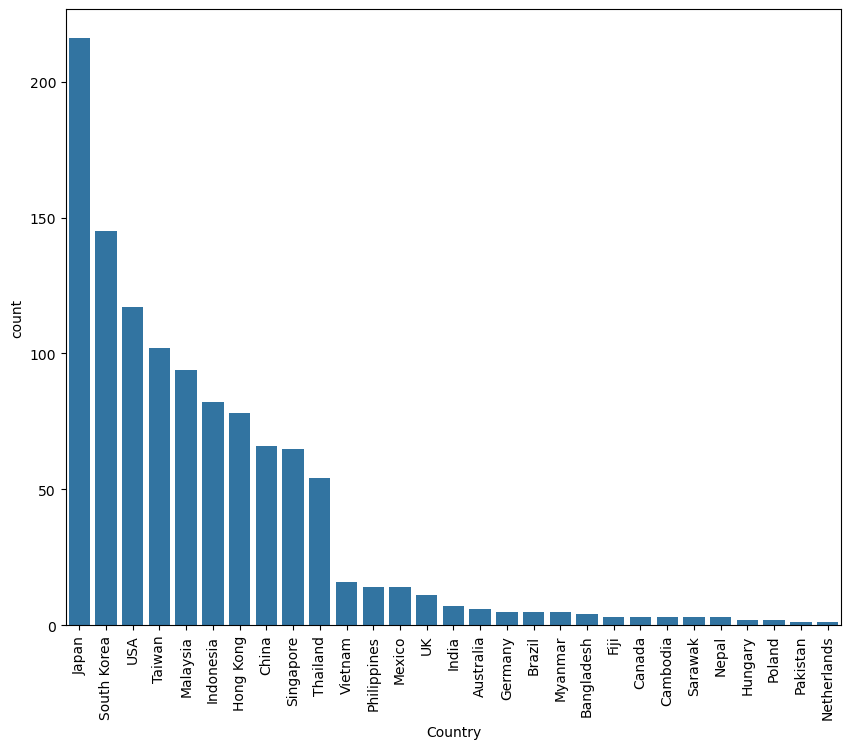

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(top_countries)
plt.xticks(rotation=90);


In [24]:
high_raited_by_brand = df_clean[df_clean['Rating_Desc'] == 'Excellent ⭐⭐⭐⭐']

top_brands = high_raited_by_brand['Brand'].value_counts()

In [25]:
top_brands

Brand
Nissin            203
Nongshim           60
Paldo              36
Indomie            36
Samyang Foods      33
                 ... 
Pama                1
Thai Chef           1
Nakaya Shouten      1
Sugakiya Foods      1
Higashi             1
Name: count, Length: 219, dtype: int64

In [65]:

style_counts = df_clean['Style'].value_counts()

valid_styles = style_counts[style_counts > 50].index


df_filtered = df_clean[df_clean['Style'].isin(valid_styles)]
df_style = df_filtered.groupby('Style')['Stars'].mean().sort_values(ascending=False)


In [67]:
df_style

Style
Pack    3.700130
Bowl    3.670686
Tray    3.545139
Cup     3.498500
Name: Stars, dtype: float64

<Axes: xlabel='Style', ylabel='Stars'>

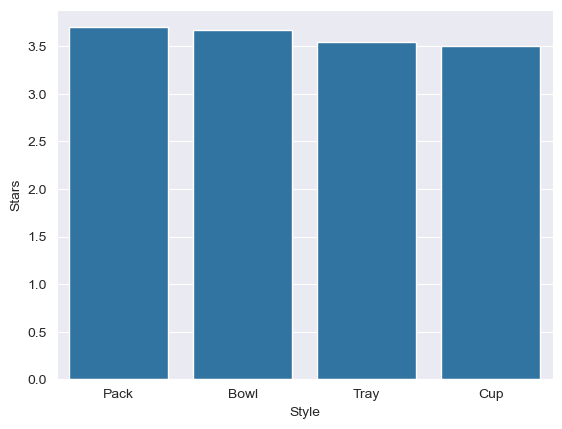

In [66]:
sns.barplot(df_style)

## 📊 Final Report – Ramen Ratings Analysis
1. Distribution of Rating Categories
Ramen products were categorized into five rating levels:

Excellent was the most common, representing 43.68% of the total.

Good followed closely with 40.54%.

Average, Poor, and Not Rated represented smaller portions of 9.69%, 5.08%, and 1.01% respectively.

This suggests that the majority of ramen products are perceived as good or excellent by reviewers.

2. Countries with the Most “Excellent” Ratings
When filtering for only the top-rated (“Excellent”) products:

Japan led the chart with 216 products.

Followed by South Korea (145), USA (117), and Taiwan (102).

Asian countries dominate the list, indicating regional strength in high-quality ramen production.

3. Brands with the Most “Excellent” Products
The brand Nissin significantly outperformed others with 203 highly rated products.

Other leading brands include Nongshim, Paldo, Indomie, and Samyang Foods.

This shows strong brand consistency in maintaining top-tier quality across different countries.

4. Best Styles of Ramen by Average Rating
Among the most common packaging styles (with >50 entries):

Pack style had the highest average rating at 3.70 stars, followed by Bowl (3.67), Tray (3.54), and Cup (3.50).

This may suggest a preference or higher quality perception in traditional packed ramen compared to cup noodles.

## Summary
The analysis indicates that:

Japan and South Korea are leaders in producing highly-rated ramen.

Brands like Nissin and Nongshim have established reputations for excellence.

Packaging style can influence perceived quality, with Pack and Bowl styles receiving higher ratings.